In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("../data/Covid_dataset.csv")
df.head()

,id,Telcos,Mobile,Gender,Age,Region,District,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,2245,Smart,xxxxxxxxxx,Male,50,Dar es Salaam,37,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
1,2246,Smart,xxxxxxxxxx,Male,92,Geita,36,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes
2,2247,Smart,xxxxxxxxxx,Female,14,Arusha,63,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes
3,2248,Zantel,xxxxxxxxxx,Female,16,Dar es Salaam,6,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes
4,2249,Smart,xxxxxxxxxx,Female,59,Iringa,27,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes


### Data Types

In [3]:
df.dtypes

id                                          int64
Telcos                                     object
Mobile                                     object
Gender                                     object
Age                                         int64
Region                                     object
District                                    int64
Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Hyper Tension                              object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
COVID-19                                   object
dtype: object

### The shape of the data

In [4]:
df.shape

(5434, 18)

In [5]:
df.size

97812

### Data information

<AxesSubplot: >

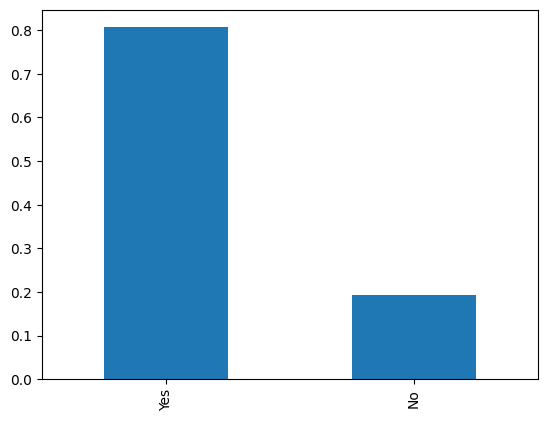

In [6]:
df['COVID-19'].value_counts(normalize=True).plot(kind='bar')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   id                                       5434 non-null   int64 
 1   Telcos                                   5434 non-null   object
 2   Mobile                                   5434 non-null   object
 3   Gender                                   5434 non-null   object
 4   Age                                      5434 non-null   int64 
 5   Region                                   5434 non-null   object
 6   District                                 5434 non-null   int64 
 7   Breathing Problem                        5434 non-null   object
 8   Fever                                    5434 non-null   object
 9   Dry Cough                                5434 non-null   object
 10  Sore throat                              5434 non-null   obj

In [8]:
df.count()

id                                         5434
Telcos                                     5434
Mobile                                     5434
Gender                                     5434
Age                                        5434
Region                                     5434
District                                   5434
Breathing Problem                          5434
Fever                                      5434
Dry Cough                                  5434
Sore throat                                5434
Hyper Tension                              5434
Abroad travel                              5434
Contact with COVID Patient                 5434
Attended Large Gathering                   5434
Visited Public Exposed Places              5434
Family working in Public Exposed Places    5434
COVID-19                                   5434
dtype: int64

In [9]:
df.describe()

,id,Age,District
count,5434.000000,5434.000000,5434.000000
mean,4961.500000,55.857563,38.931726
std,1568.805012,31.964801,22.221008
min,2245.000000,1.000000,1.000000
25%,3603.250000,28.000000,20.000000
50%,4961.500000,55.000000,39.000000
75%,6319.750000,84.000000,58.000000
max,7678.000000,111.000000,77.000000


### The max and min counts of all columns

In [10]:
for series in df:
    max_count = df[series].value_counts().head(1)
    min_count = df[series].value_counts().tail(1)
    print("Max count of ", series, max_count)
    print("Min count of ", series, min_count)

Max count of  id 2245    1
Name: id, dtype: int64
Min count of  id 7678    1
Name: id, dtype: int64
Max count of  Telcos Vodacom    826
Name: Telcos, dtype: int64
Min count of  Telcos TTCL    723
Name: Telcos, dtype: int64
Max count of  Mobile xxxxxxxxxx    5434
Name: Mobile, dtype: int64
Min count of  Mobile xxxxxxxxxx    5434
Name: Mobile, dtype: int64
Max count of  Gender Male    2737
Name: Gender, dtype: int64
Min count of  Gender Female    2697
Name: Gender, dtype: int64
Max count of  Age 102    75
Name: Age, dtype: int64
Min count of  Age 2    30
Name: Age, dtype: int64
Max count of  Region Dodoma    813
Name: Region, dtype: int64
Min count of  Region Katavi    755
Name: Region, dtype: int64
Max count of  District 34    88
Name: District, dtype: int64
Min count of  District 53    55
Name: District, dtype: int64
Max count of  Breathing Problem Yes    3620
Name: Breathing Problem, dtype: int64
Min count of  Breathing Problem No    1814
Name: Breathing Problem, dtype: int64
Max coun

## Task Questions

### Most Dangerous for age group 

In [11]:
positive_df = df[df['COVID-19'] == 'Yes']

Text(0.5, 1.0, 'Age vs count for covid 19 - Top 5 Ages')

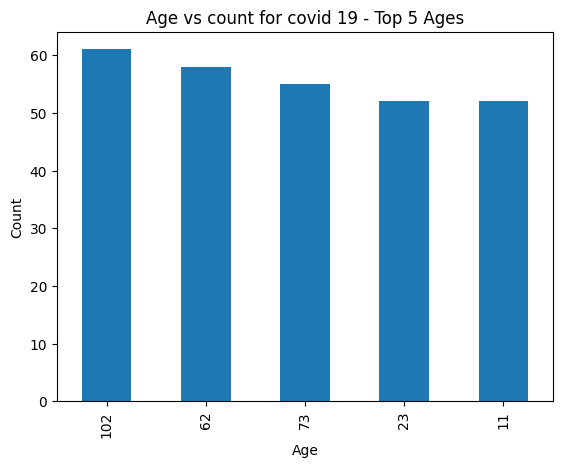

In [12]:
fig = positive_df["Age"].value_counts().head().plot(kind='bar')
fig.set_xlabel("Age")
fig.set_ylabel("Count")
fig.set_title("Age vs count for covid 19 - Top 5 Ages")

We can say that age 102 is the most dangerous for Covid

### Male with fever positivity rate

In [13]:
male_test = df[df["Gender"]=="Male"]
male_test2 = df[df["Fever"] =="Yes"]

In [14]:
age_group = df[["Age","COVID-19"]]

In [15]:
gender = df.groupby(["Gender","Fever","COVID-19"]).size()
male= gender["Male"]
fevered_male= male["Yes"]
#percent = fevered_male["Yes"]/(fevered_male["Yes"]+fevered_male["No"])
#percent * 100

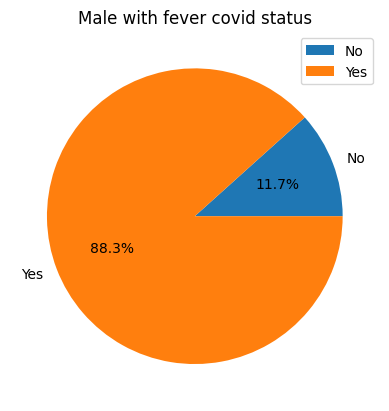

In [16]:
fig = fevered_male.plot(kind="pie",autopct='%1.1f%%')
fig.set_title("Male with fever covid status")
fig.legend()

We can say that 88.3% of male with fever have covid

In [17]:
male

Fever  COVID-19
No     No           268
       Yes          306
Yes    No           252
       Yes         1911
dtype: int64

### Region with most and least positive

In [18]:
region = positive_df["Region"].value_counts()
region_max = region.head(1)
region_min = region.tail(1)

print("most dense region ",region_max)
print("least dense region",region_min)

most dense region  Dodoma    665
Name: Region, dtype: int64
least dense region Bukoba    610
Name: Region, dtype: int64


We can now say that: Most dense region is : Dodoma, and least dense region is: Bukoba

### Other miscellaneous

#### Infection rate after attending a large event
This shows the percent of people who had attended a large event prior to testing positive

Text(0.5, 1.0, 'Infection after large gathering')

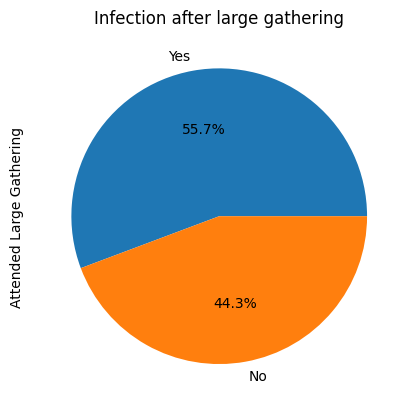

In [19]:
infection_after_gathering = positive_df["Attended Large Gathering"].value_counts()
fig = infection_after_gathering.plot(kind='pie',autopct='%1.1f%%')
fig.set_title("Infection after large gathering")

### Covid positivity distribution by telecom

Text(0, 0.5, 'Count')

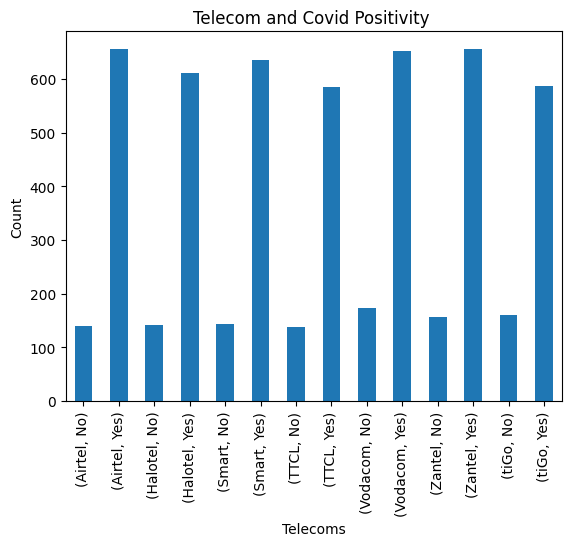

In [20]:
telecom = df.groupby(["Telcos","COVID-19"]).size()
fig = telecom.plot(kind='bar')
fig.set_title('Telecom and Covid Positivity ')
fig.set_xlabel("Telecoms")
fig.set_ylabel("Count")

## Standardization

In [21]:
for column in df:
    if(df[column].nunique() < 10):
        df[column] = df[column].astype('category')
df.dtypes

id                                            int64
Telcos                                     category
Mobile                                     category
Gender                                     category
Age                                           int64
Region                                     category
District                                      int64
Breathing Problem                          category
Fever                                      category
Dry Cough                                  category
Sore throat                                category
Hyper Tension                              category
Abroad travel                              category
Contact with COVID Patient                 category
Attended Large Gathering                   category
Visited Public Exposed Places              category
Family working in Public Exposed Places    category
COVID-19                                   category
dtype: object

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'District'}>, <AxesSubplot: >]],
      dtype=object)

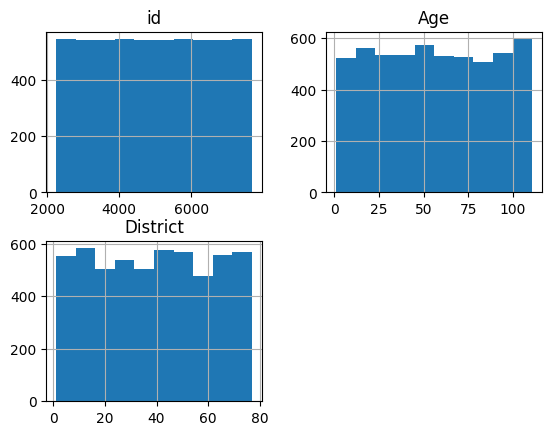

In [22]:
df.hist()

In [23]:
fevered_female  = df[(df["Gender"]=="Female") & (df["Fever"]=="Yes")]

In [24]:
print(fevered_female.groupby("COVID-19").size())

COVID-19
No      264
Yes    1846
dtype: int64


### Male Female Distribution of data

Male      2737
Female    2697
Name: Gender, dtype: int64


<AxesSubplot: >

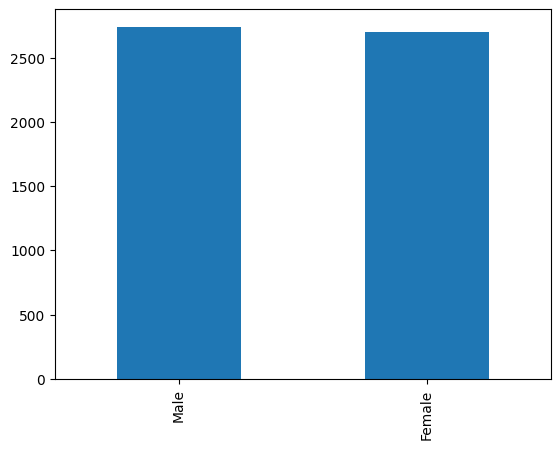

In [25]:
male_female = df["Gender"].value_counts()
print(male_female)
male_female.plot(kind='bar')

<AxesSubplot: ylabel='Gender'>

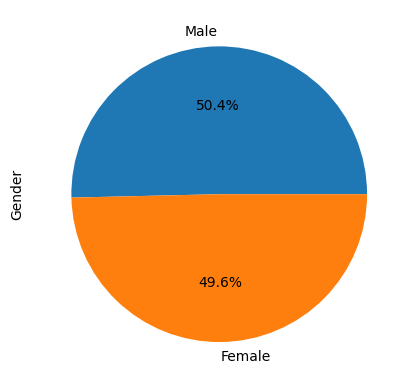

In [26]:
male_female.plot(kind='pie',autopct = '%1.1f%%')

We can conclude there are more males in this dataset

In [27]:

dataframe = df.copy()
dataframe.dtypes

id                                            int64
Telcos                                     category
Mobile                                     category
Gender                                     category
Age                                           int64
Region                                     category
District                                      int64
Breathing Problem                          category
Fever                                      category
Dry Cough                                  category
Sore throat                                category
Hyper Tension                              category
Abroad travel                              category
Contact with COVID Patient                 category
Attended Large Gathering                   category
Visited Public Exposed Places              category
Family working in Public Exposed Places    category
COVID-19                                   category
dtype: object

## One hot Encodings

### Generating encodings

In [29]:
from category_encoders import OneHotEncoder

In [30]:
dataframe.drop(["Mobile"],axis=1)

,id,Telcos,Gender,Age,Region,District,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,2245,Smart,Male,50,Dar es Salaam,37,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
1,2246,Smart,Male,92,Geita,36,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes
2,2247,Smart,Female,14,Arusha,63,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes
3,2248,Zantel,Female,16,Dar es Salaam,6,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes
4,2249,Smart,Female,59,Iringa,27,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,7674,tiGo,Female,49,Katavi,65,Yes,Yes,No,Yes,No,No,No,No,No,No,Yes
5430,7675,Smart,Male,73,Arusha,76,Yes,Yes,Yes,No,Yes,No,No,No,No,No,Yes
5431,7676,Vodacom,Female,102,Katavi,55,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No
5432,7677,Vodacom,Male,109,Bukoba,10,Yes,Yes,Yes,No,No,No,No,No,No,No,No


In [31]:
encoder = OneHotEncoder(use_cat_names=True)
encoder.fit_transform(dataframe)

/home/pratik/Documents/InternshipStuffs/Week 2/Excercise 1/ai-ml-interns/myvenv/lib/python3.8/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/pratik/Documents/InternshipStuffs/Week 2/Excercise 1/ai-ml-interns/myvenv/lib/python3.8/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/pratik/Documents/InternshipStuffs/Week 2/Excercise 1/ai-ml-interns/myvenv/lib/python3.8/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/pratik/Documents/InternshipStuffs/Week 2/Excercise 1/ai-ml-interns/myvenv/lib/python3.8/site-packages/category_encoders/one_hot.py

,id,Telcos_Smart,Telcos_Zantel,Telcos_tiGo,Telcos_Halotel,Telcos_TTCL,Telcos_Airtel,Telcos_Vodacom,Mobile_xxxxxxxxxx,Gender_Male,...,Contact with COVID Patient_Yes,Contact with COVID Patient_No,Attended Large Gathering_No,Attended Large Gathering_Yes,Visited Public Exposed Places_Yes,Visited Public Exposed Places_No,Family working in Public Exposed Places_Yes,Family working in Public Exposed Places_No,COVID-19_Yes,COVID-19_No
0,2245,1,0,0,0,0,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1,2246,1,0,0,0,0,0,0,1,1,...,0,1,0,1,1,0,0,1,1,0
2,2247,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
3,2248,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,1,0
4,2249,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,7674,0,0,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
5430,7675,1,0,0,0,0,0,0,1,1,...,0,1,1,0,0,1,0,1,1,0
5431,7676,0,0,0,0,0,0,1,1,0,...,0,1,1,0,0,1,0,1,0,1
5432,7677,0,0,0,0,0,0,1,1,1,...,0,1,1,0,0,1,0,1,0,1
